In [1]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
from scipy.signal import freqz
import csv

import pomozne as lib
import filters as fil
import random

# Poskus 2: primerjava testnega signala ENF z dodanim šumom in referenčnim signalom ENF

V poskusu merimo korelacijo testnega signala ENF z dodanim sintetičnim belim Gasussovim šumom in referenčnim signalom ENF. 

V poskusu uporabimo 10 referenčnih posnetkov. Iz vsakega referenčnega posnetka naključno izrežemo 10 odsekov z naključno dolžino (med 10 in 120 sekund) - testni signali.

Za vsak čist testni signal generiramo 10 testnih signalov z dodanim belim Gaussovim šumom. Nad temi signali izvajamo korelacijo z referenčnim signalom.

In [2]:
SAMPLE_RATE = 400

In [3]:
base_path = "./posnetki/poskus4/"

Primerjava različnih sigem, dolžin in filtrov

In [4]:
# csvimport csv

header = [
    "ref_no",
    "t_start_n",
    "t_duration_n",
    "t_start_sec",
    "t_duration_sec",
    "noise",
    "f_lowcut",
    "f_highcut",
    "f_order",
    "max_corr",
    "max_corr_n",
    "max_corr_t",
    "correct_corr",
    "result"
]

file = open('./rezultati/poskus4/res.csv', 'w', encoding='UTF8', newline='')
writer = csv.writer(file)
writer.writerow(header)

142

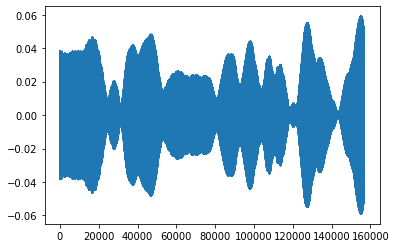

False


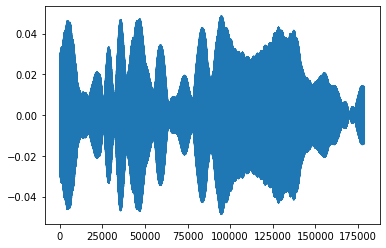

False


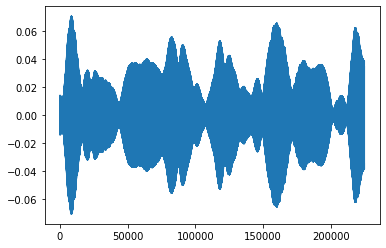

False


In [5]:
for audio_index in range(1, 4):
    audio_ref_path = base_path + "00" + str(audio_index) + "_ref.wav"
    audio_path = base_path + "00" + str(audio_index) + ".wav"
    audio_ref, _ = librosa.load(audio_ref_path, sr=SAMPLE_RATE, mono=True)
    audio, _ = librosa.load(audio_path, sr=SAMPLE_RATE, mono=True)

    # generating random signal from signal
    t_duration_sec = 90
    t_duration_n = t_duration_sec * SAMPLE_RATE
    t_start_n = random.randint(0, (len(audio_ref) - t_duration_n))
    t_start_sec = lib.index_to_seconds(SAMPLE_RATE, audio_ref, t_start_n)
    test_signal = audio[t_start_n: t_start_n + t_duration_n]

    filtered_audio = fil.butter_bandpass_filter(
        test_signal, 48, 52, SAMPLE_RATE, 6)

    corr = lib.korelacija(audio_ref, filtered_audio)
    max_value = max(corr)[0]
    max_index = corr.index(max_value)

    cor_time_start = lib.index_to_seconds(
        SAMPLE_RATE, audio_ref, max_index)
    test_passed = t_start_n == max_index

    data = [
        audio_index,
        t_start_n,
        t_duration_n,
        t_start_sec,
        t_start_n,
        None,
        None,
        None,
        None,
        max_value,
        max_index,
        cor_time_start,
        corr[t_start_n][0],
        test_passed
    ]
    writer.writerow(data)
    plt.plot(corr)
    plt.show()
    print(test_passed)


In [6]:
file.close()

### Zaključek poskusa

V poskusu smo analizirali korelacijo med testnim signalom ENF brez dodanega šuma in referenčnim signalom ENF. Testni signal je predstavljal 30 sekundni izsek daljšega referenčnega signala z odmikom 190 sekund.

Glede na neprisotnost šuma, smo pričakovali visoko korelacijo med testnim in referenčnim signalom. Najvišja pričakovana korelacija je bila enaka ena, izračunana med testnim signalom in referenčnim signalom v času `190 - 220s`.

Iz poskusa se je izkazalo, da je naša predpostavka bila pravilna.

Iz obeh poskusov lahko predpostavimo, da naša tehnika zaznave korelacije pravilno deluje. Zato s poskusi nadaljujemo.